# Fungi Photo Gallery

In [1]:
import numpy as np
import pandas as pd 
import random
import os
import cv2
import matplotlib.pyplot as plt
import requests

In [2]:
df=pd.read_csv('/kaggle/input/fungi-clef-2025/metadata/FungiTastic-FewShot/FungiTastic-FewShot-Train.csv',sep=',')
print(df.columns.tolist())
display(df[0:2].T)

['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode', 'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet', 'hasCoordinate', 'species', 'iucnRedListCategory', 'substrate', 'latitude', 'longitude', 'coorUncert', 'observationID', 'region', 'district', 'filename', 'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover', 'biogeographicalRegion']


,0,1
eventDate,2021-01-24,2021-02-27
year,2021,2021
month,1.0,2.0
day,24.0,27.0
habitat,Mixed woodland (with coniferous and deciduous ...,garden
countryCode,DK,DK
scientificName,Xylohypha ferruginosa (Corda) S.Hughes,"Comatricha alta Preuss, 1851"
kingdom,Fungi,Protozoa
phylum,Ascomycota,Mycetozoa
class,Eurotiomycetes,Myxomycetes


In [3]:
dir0='/kaggle/input/fungi-clef-2025/images/FungiTastic-FewShot/train/720p'
cols=['species', 'filename']
df=df[cols]

In [4]:
def dataset2show16(df):

    names0 = df['species'].value_counts()
    valid_names = names0[names0 >= 4].index.tolist()
    names = random.sample(valid_names,16)
    
    selected_images = []
    grouped_images = {}  # Dictionary to store images grouped by name
    for name in names:
        paths = df[df['species'] == name]['filename'].tolist()
        paths2 = random.sample(paths, 4)  # Select 4 random images per individual
        grouped_images[name] = [os.path.join(dir0,p) for p in paths2]
    
    fig, axes = plt.subplots(16, 4, figsize=(10, 40))
    
    for row, (name, images) in enumerate(grouped_images.items()):
        # Set row title
        #axes[row, 0].set_title(name, fontsize=12, loc='left', pad=10)
        axes[row, 0].annotate(name, xy=(0, 1), xycoords="axes fraction",fontsize=12, ha="left", va="bottom")
        
        for col, path in enumerate(images):
            img = cv2.imread(path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
                axes[row, col].imshow(img)
            axes[row, col].axis("off")
    
    #plt.tight_layout()
    plt.show()


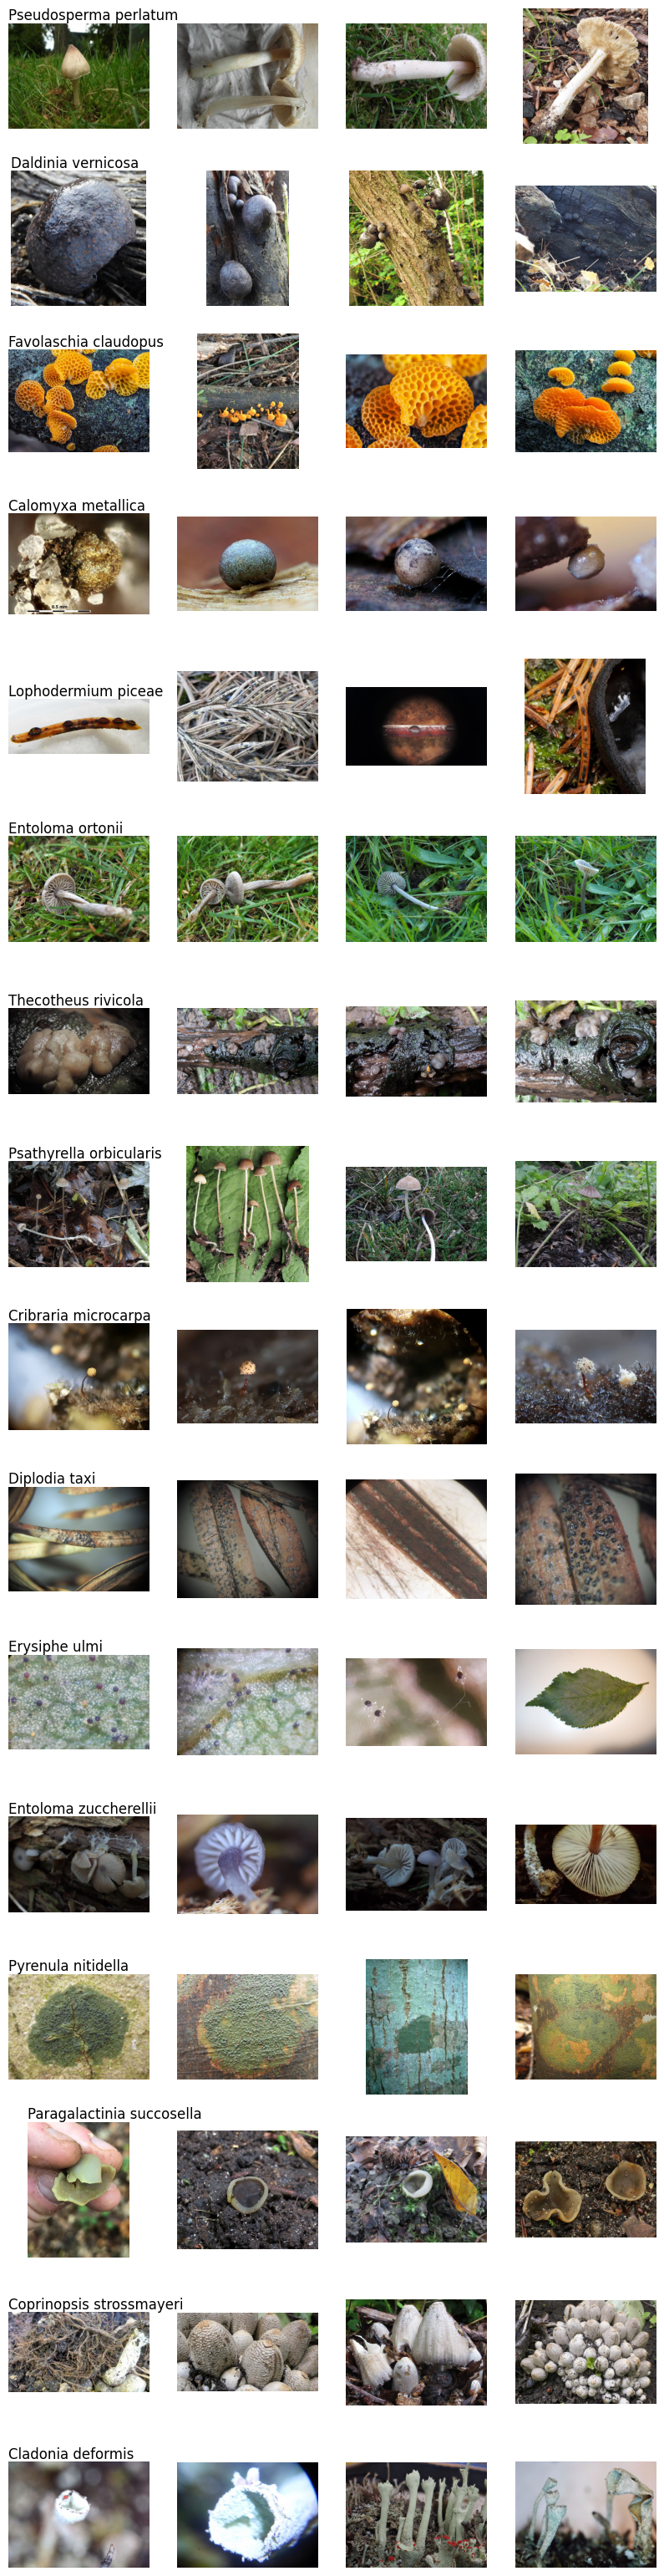

In [5]:
dataset2show16(df)